# Task 1 Classification Algorithms

# 1 (a) Decision Tree Classifier Model

In [1]:
# Obesity Classification (Decision Tree)

# In the context of this dataset, the "NObeyesdad" column is the class label or dependent variable, and the other columns
# (except "id") are independent variables or input features. In classification, the goal is to predict the class label of 
# a sample (output or y) based on its features (input or X). Therefore, in the first step, we should separate the data into
# input and output. Since the "id" column has no effect on whether the individual has a certain type of obesity, we should 
# exclude it from the input features.

# Importing libraries

In [2]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
%matplotlib inline
import math as ma

# Load the dataset into dataframe

In [3]:

data_obese=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [4]:
data_obese

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000  -64.000000                            yes   
1     Female        NaN  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000       NaN   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

# Exploratory Data Analysis

In [5]:
data_obese.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62   -64.0                            yes   no   2.0   
1  Female   NaN    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0     NaN    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [6]:
data_obese.tail()

Gender        Age    Height      Weight family_history_with_overweight  \
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O SCC       FAF       TUE  \
2106  yes   3.0  3.0  Sometimes    no  1.728139  no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130  no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193  no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339  no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513  no  1.026452  0.714137   

           CALC                 MTRANS        NObeyesdad  
2106  Sometimes  Public_Transportation  Obesity_Type_III  
2107  Sometimes  Public_Transportation  Obesity_Type_III  
2108  Sometimes  Public_Transportation  Obesity_Type_III  
2109  Sometimes  Public_Transportation  Obesity_Type_III  
2110  Sometimes  Public_Transportation  Obesity_Type_III

In [7]:
# checking 30 rows

data_obese.iloc[:30]

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0   Female  21.0    1.62   -64.0                            yes   no   2.0   
1   Female   NaN    1.52    56.0                            yes   no   3.0   
2     Male  23.0    1.80    77.0                            yes   no   2.0   
3     Male  27.0     NaN    87.0                             no   no   3.0   
4     Male  22.0    1.78    89.8                             no   no   2.0   
5     Male  29.0    1.62    53.0                             no  yes   2.0   
6   Female  23.0    1.50    55.0                            yes  yes   3.0   
7     Male   NaN    1.64   -53.0                             no   no   2.0   
8     Male  24.0    1.78    64.0                            yes  yes   3.0   
9     Male  22.0     NaN    68.0                            yes  yes   2.0   
10    Male  26.0    1.85   105.0                            yes  yes   3.0   
11  Female  21.0    1.72    80.0                            yes  yes   2.0   
12    Male  22.0    1.65   -56.0                             no   no   3.0   
13    Male  41.0    1.80    99.0                             no  yes   2.0   
14    Male  23.0    1.77    60.0                            yes  yes   3.0   
15  Female  22.0    1.70    66.0                            yes   no   3.0   
16    Male  27.0     NaN  -102.0                            yes  yes   2.0   
17  Female   NaN    1.53    78.0                             no  yes   2.0   
18  Female  30.0    1.71    82.0                            yes  yes   3.0   
19  Female  23.0    1.65    70.0                            yes   no   2.0   
20    Male  22.0    1.65    80.0                            yes   no   2.0   
21  Female  52.0    1.69    87.0                            yes  yes   3.0   
22  Female  22.0    1.65    60.0                            yes  yes   3.0   
23  Female  22.0    1.60    82.0                            yes  yes   1.0   
24    Male  21.0    1.85    68.0                            yes  yes   2.0   
25    Male  20.0    1.60     NaN                            yes   no   2.0   
26    Male  21.0    1.70    65.0                            yes  yes   2.0   
27  Female  23.0    1.60    52.0                             no  yes   2.0   
28    Male  19.0    1.75    76.0                            yes  yes   3.0   
29    Male  23.0    1.68     NaN                             no  yes   2.0   

    NCP        CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0   3.0   Sometimes    no   2.0   no  0.0  1.0          no   
1   3.0   Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2   3.0   Sometimes    no   2.0   no  2.0  1.0  Frequently   
3   3.0   Sometimes    no   2.0   no  2.0  0.0  Frequently   
4   1.0   Sometimes    no   2.0   no  0.0  0.0   Sometimes   
5   3.0   Sometimes    no   2.0   no  0.0  0.0   Sometimes   
6   3.0   Sometimes    no   2.0   no  1.0  0.0   Sometimes   
7   3.0   Sometimes    no   2.0   no  3.0  0.0   Sometimes   
8   3.0   Sometimes    no   2.0   no  1.0  1.0  Frequently   
9   3.0   Sometimes    no   2.0   no  1.0  1.0          no   
10  3.0  Frequently    no   3.0   no  2.0  2.0   Sometimes   
11  3.0  Frequently    no   2.0  yes  2.0  1.0   Sometimes   
12  3.0   Sometimes    no   3.0   no  2.0  0.0   Sometimes   
13  3.0   Sometimes    no   2.0   no  2.0  1.0  Frequently   
14  1.0   Sometimes    no   1.0   no  1.0  1.0   Sometimes   
15  3.0      Always    no   2.0  yes  2.0  1.0   Sometimes   
16  1.0   Sometimes    no   1.0   no  1.0  0.0   Sometimes   
17  1.0   Sometimes    no   2.0   no  0.0  0.0          no   
18  4.0  Frequently   yes   1.0   no  0.0  0.0          no   
19  1.0   Sometimes    no   2.0   no  0.0  0.0   Sometimes   
20  3.0   Sometimes    no   2.0   no  3.0  2.0          no   
21  1.0   Sometimes   yes   2.0   no  0.0  0.0          no   
22  3.0   Sometimes    no   2.0   no  1.0  0.0   Sometimes   
23  1.0   Sometimes    no   2.0   no  0.0  2.0   Sometimes   
24  3.0   Sometimes    no   2.0   n

# summary of the data frame

In [8]:


# The info() method prints a concise summary of the DataFrame. The information contains the number of rows,
# number of columns, column labels, column data types,
# the number of non-null values in each column, and memory usage.

data_obese.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2106 non-null   float64
 2   Height                          2106 non-null   float64
 3   Weight                          2104 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [9]:
data_obese.describe()

Age       Height       Weight         FCVC          NCP  \
count  2106.000000  2106.000000  2104.000000  2111.000000  2111.000000   
mean     24.318565     1.701525    86.362960     2.419043     2.685628   
std       6.349520     0.093157    27.183523     0.533927     0.778039   
min      14.000000     1.450000  -102.000000     1.000000     1.000000   
25%      19.948756     1.630000    65.978172     2.000000     2.658738   
50%      22.797110     1.700198    83.000000     2.385502     3.000000   
75%      26.000000     1.768234   107.656590     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

In [10]:
# it returns a dataframe containing the count, mean, standard deviation,
# minimum, 25th percentile,25th percentile, 75th percentile, 
# and maximum values for each numerical column in the dataset

data_obese.describe(include = 'all')

Gender          Age       Height       Weight  \
count    2111  2106.000000  2106.000000  2104.000000   
unique      2          NaN          NaN          NaN   
top      Male          NaN          NaN          NaN   
freq     1068          NaN          NaN          NaN   
mean      NaN    24.318565     1.701525    86.362960   
std       NaN     6.349520     0.093157    27.183523   
min       NaN    14.000000     1.450000  -102.000000   
25%       NaN    19.948756     1.630000    65.978172   
50%       NaN    22.797110     1.700198    83.000000   
75%       NaN    26.000000     1.768234   107.656590   
max       NaN    61.000000     1.980000   173.000000   

       family_history_with_overweight  FAVC         FCVC          NCP  \
count                            2111  2111  2111.000000  2111.000000   
unique                              2     2          NaN          NaN   
top                               yes   yes          NaN          NaN   
freq                             1726  1866          NaN          NaN   
mean                              NaN   NaN     2.419043     2.685628   
std                               NaN   NaN     0.533927     0.778039   
min                               NaN   NaN     1.000000     1.000000   
25%                               NaN   NaN     2.000000     2.658738   
50%                               NaN   NaN     2.385502     3.000000   
75%                               NaN   NaN     3.000000     3.000000   
max                               NaN   NaN     3.000000     4.000000   

             CAEC SMOKE         CH2O   SCC          FAF          TUE  \
count        2111  2111  2111.000000  2111  2111.000000  2111.000000   
unique          4     2          NaN     2          NaN          NaN   
top     Sometimes    no          NaN    no          NaN          NaN   
freq         1765  2067          NaN  2015          NaN          NaN   
mean          NaN   NaN     2.008011   NaN     1.010298     0.657866   
std           NaN   NaN     0.612953   NaN     0.850592     0.608927   
min           NaN   NaN     1.000000   NaN     0.000000     0.000000   
25%           NaN   NaN     1.584812   NaN     0.124505     0.000000   
50%           NaN   NaN     2.000000   NaN     1.000000     0.625350   
75%           NaN   NaN     2.477420   NaN     1.666678     1.000000   
max           NaN   NaN     3.000000   NaN     3.000000     2.000000   

             CALC                 MTRANS      NObeyesdad  
count        2111                   2111            2111  
unique          4                      5               7  
top     Sometimes  Public_Transportation  Obesity_Type_I  
freq         1401                   1580             351  
mean          NaN                    NaN             NaN  
std           NaN                    NaN             NaN  
min           NaN                    NaN             NaN  
25%           NaN                    NaN             NaN  
50%           NaN                    NaN             NaN  
75%           NaN                    NaN             NaN  
max           NaN                    NaN             NaN

In [11]:
#Counting each value in the first column.

data_obese.iloc[:,0].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
# Showing all elements using iloc:

data_obese.iloc[:,:]

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000  -64.000000                            yes   
1     Female        NaN  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000       NaN   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

# Search for Missing Data

In [13]:
# Find the missing columns
missing_cols = data_obese.columns[data_obese.isnull().any()].tolist()

# Print the missing columns
print("Missing columns:", missing_cols)

Missing columns: ['Age', 'Height', 'Weight']


In [14]:
# Count the number of missing values in each column
missing_age = data_obese['Age'].isna().sum()
missing_weight = data_obese['Weight'].isna().sum()
missing_height = data_obese['Height'].isna().sum()

# Print the results
print(f"Number of missing values in Age: {missing_age}")
print(f"Number of missing values in Weight: {missing_weight}")
print(f"Number of missing values in Height: {missing_height}")

Number of missing values in Age: 5
Number of missing values in Weight: 7
Number of missing values in Height: 5


# Converting Categorical Variable to Numerical Variable

In [15]:
# Convert categorical variables Gender to Numerical Variable

data_obese['Gender'] = data_obese['Gender'].replace(['Male','Female'],[0,1])

In [16]:
columns_to_replace = ['family_history_with_overweight', 'SMOKE', 'FAVC', 'SCC']
replacement_dict = {'yes': 0, 'no': 1}

for column in columns_to_replace:
    data_obese[column] = data_obese[column].replace(replacement_dict)


In [17]:
data_obese.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       1  21.0    1.62   -64.0                               0     1   2.0   
1       1   NaN    1.52    56.0                               0     1   3.0   
2       0  23.0    1.80    77.0                               0     1   2.0   
3       0  27.0     NaN    87.0                               1     1   3.0   
4       0  22.0    1.78    89.8                               1     1   2.0   

   NCP       CAEC  SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes      1   2.0    1  0.0  1.0          no   
1  3.0  Sometimes      0   3.0    0  3.0  0.0   Sometimes   
2  3.0  Sometimes      1   2.0    1  2.0  1.0  Frequently   
3  3.0  Sometimes      1   2.0    1  2.0  0.0  Frequently   
4  1.0  Sometimes      1   2.0    1  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

# Columns Count 

In [18]:
# Count the values of the "CAEC" column

caec_counts = data_obese['CAEC'].value_counts()

# Print the counts
print(caec_counts)

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64


In [19]:
# Count the values of the "CAEC" column

calc_counts = data_obese['CALC'].value_counts()

# Print the counts
print(calc_counts)

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64


In [20]:
columns_to_replace = ['CALC', 'CAEC']
replacement_dict = {'no': 0, 'Sometimes': 1, 'Frequently' :2, 'Always': 3}

for column in columns_to_replace:
    data_obese[column] = data_obese[column].replace(replacement_dict)

In [21]:
data_obese.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       1  21.0    1.62   -64.0                               0     1   2.0   
1       1   NaN    1.52    56.0                               0     1   3.0   
2       0  23.0    1.80    77.0                               0     1   2.0   
3       0  27.0     NaN    87.0                               1     1   3.0   
4       0  22.0    1.78    89.8                               1     1   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC                 MTRANS  \
0  3.0     1      1   2.0    1  0.0  1.0     0  Public_Transportation   
1  3.0     1      0   3.0    0  3.0  0.0     1  Public_Transportation   
2  3.0     1      1   2.0    1  2.0  1.0     2  Public_Transportation   
3  3.0     1      1   2.0    1  2.0  0.0     2                Walking   
4  1.0     1      1   2.0    1  0.0  0.0     1  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

In [22]:
# count the Data in a column MTRANS

mtrans_count = data_obese['MTRANS'].value_counts()

# Print the counts
print(mtrans_count)

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64


In [23]:
columns_to_replace = ['MTRANS']
replacement_dict = {'Public_Transportation': 0, 'Automobile': 1, 'Walking' :2, 'Motorbike': 3, 'Bike': 4}

for column in columns_to_replace:
    data_obese[column] = data_obese[column].replace(replacement_dict)

In [24]:
data_obese.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       1  21.0    1.62   -64.0                               0     1   2.0   
1       1   NaN    1.52    56.0                               0     1   3.0   
2       0  23.0    1.80    77.0                               0     1   2.0   
3       0  27.0     NaN    87.0                               1     1   3.0   
4       0  22.0    1.78    89.8                               1     1   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS           NObeyesdad  
0  3.0     1      1   2.0    1  0.0  1.0     0       0        Normal_Weight  
1  3.0     1      0   3.0    0  3.0  0.0     1       0        Normal_Weight  
2  3.0     1      1   2.0    1  2.0  1.0     2       0        Normal_Weight  
3  3.0     1      1   2.0    1  2.0  0.0     2       2   Overweight_Level_I  
4  1.0     1      1   2.0    1  0.0  0.0     1       0  Overweight_Level_II

# Renaming the Target Feature (NObeyesdad)

In [25]:
# Rename the NObeyesdad list

data_obese['NObeyesdad'] = data_obese['NObeyesdad'].replace({'Obesity_Type_I': 'Type I',
                                                                 'Obesity_Type_II': 'Type II',
                                                                 'Obesity_Type_III': 'Type III',
                                                                 'Insufficient_Weight': 'Insul_Wght',
                                                                 'Normal_Weight': 'Norm_W',
                                                                 'Overweight_Level_I': 'OvW_Lv1', 
                                                                 'Overweight_Level_II': 'OvW_Lv2'})

# Print the count of each unique value in the "Obesity_Type" column
    
print(data_obese['NObeyesdad'].value_counts())

Type I        351
Type III      324
Type II       297
OvW_Lv1       290
OvW_Lv2       290
Norm_W        287
Insul_Wght    272
Name: NObeyesdad, dtype: int64


# Visualizing the Target Features

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


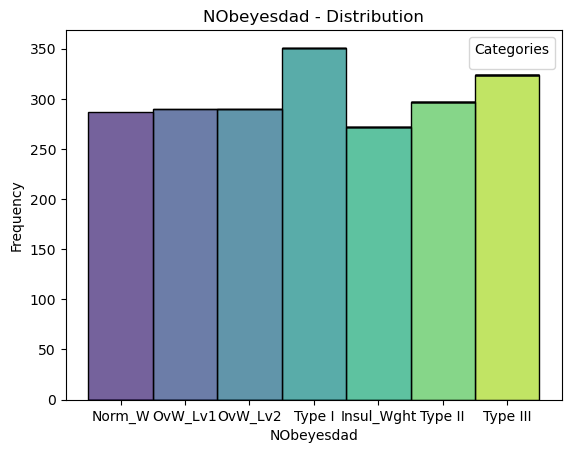

In [26]:
sns.histplot(data=data_obese, x='NObeyesdad', hue='NObeyesdad', multiple='stack', palette='viridis')
plt.title('NObeyesdad - Distribution')
plt.xlabel('NObeyesdad')
plt.ylabel('Frequency')
plt.legend(title='Categories')
plt.show()

In [27]:
# Count the values of the "NObeyesdad" column

NObeyesdad_counts = data_obese['NObeyesdad'].value_counts()

# Print the counts
print(NObeyesdad_counts)

Type I        351
Type III      324
Type II       297
OvW_Lv1       290
OvW_Lv2       290
Norm_W        287
Insul_Wght    272
Name: NObeyesdad, dtype: int64


# Convert the NObeyesdad Column Numeric Data

In [28]:
replacement_dict = {
    'Type I': 0,
    'Type II': 1,
    'Type III': 2,
    'OvW_Lv1': 3,
    'OvW_Lv2': 4,
    'Norm_W': 5,
    'Insul_Wght': 6
}
     
data_obese['NObeyesdad'] = data_obese['NObeyesdad'].map(replacement_dict)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


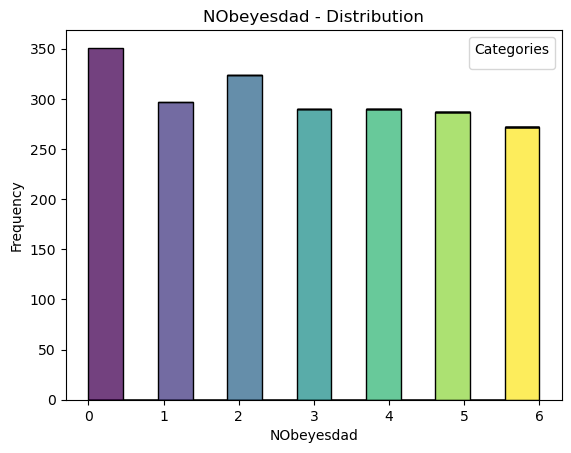

In [29]:
sns.histplot(data=data_obese, x='NObeyesdad', hue='NObeyesdad', multiple='stack', palette='viridis')
plt.title('NObeyesdad - Distribution')
plt.xlabel('NObeyesdad')
plt.ylabel('Frequency')
plt.legend(title='Categories')
plt.show()

# Outliers Check

Outliers: Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NObeyesdad]
Index: []


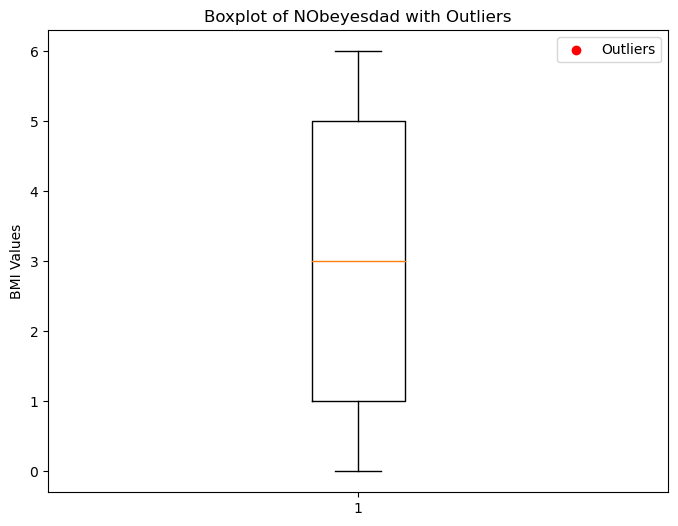

In [30]:
# Calculate quartiles
Q1 = data_obese['NObeyesdad'].quantile(0.25)
Q3 = data_obese['NObeyesdad'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data_obese[(data_obese['NObeyesdad'] < lower_bound) | (data_obese['NObeyesdad'] > upper_bound)]
print("Outliers:", outliers)

plt.figure(figsize=(8, 6))
plt.boxplot(data_obese['NObeyesdad'])
plt.title('Boxplot of NObeyesdad with Outliers')
plt.ylabel('BMI Values')

plt.scatter(outliers.index + 1, outliers['NObeyesdad'], color='red', label='Outliers')
plt.legend()
plt.show()


In [31]:
data_obese.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       1  21.0    1.62   -64.0                               0     1   2.0   
1       1   NaN    1.52    56.0                               0     1   3.0   
2       0  23.0    1.80    77.0                               0     1   2.0   
3       0  27.0     NaN    87.0                               1     1   3.0   
4       0  22.0    1.78    89.8                               1     1   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     1      1   2.0    1  0.0  1.0     0       0           5  
1  3.0     1      0   3.0    0  3.0  0.0     1       0           5  
2  3.0     1      1   2.0    1  2.0  1.0     2       0           5  
3  3.0     1      1   2.0    1  2.0  0.0     2       2           3  
4  1.0     1      1   2.0    1  0.0  0.0     1       0           4

In [32]:
data_obese['Age']

0       21.000000
1             NaN
2       23.000000
3       27.000000
4       22.000000
          ...    
2106    20.976842
2107    21.982942
2108    22.524036
2109    24.361936
2110    23.664709
Name: Age, Length: 2111, dtype: float64

#  Handle Missing Values


In [33]:
# Step 1: Handle Missing Values
# Replace missing values with the median of the column

median_age = data_obese['Age'].median()
data_obese['Age'].fillna(median_age, inplace=True)

# Step 2: Convert to Integer

data_obese['Age'] = data_obese['Age'].astype(int)


In [34]:
data_obese['Age']

0       21
1       22
2       23
3       27
4       22
        ..
2106    20
2107    21
2108    22
2109    24
2110    23
Name: Age, Length: 2111, dtype: int32

In [35]:
data_obese.head()

Gender  Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       1   21    1.62   -64.0                               0     1   2.0   
1       1   22    1.52    56.0                               0     1   3.0   
2       0   23    1.80    77.0                               0     1   2.0   
3       0   27     NaN    87.0                               1     1   3.0   
4       0   22    1.78    89.8                               1     1   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     1      1   2.0    1  0.0  1.0     0       0           5  
1  3.0     1      0   3.0    0  3.0  0.0     1       0           5  
2  3.0     1      1   2.0    1  2.0  1.0     2       0           5  
3  3.0     1      1   2.0    1  2.0  0.0     2       2           3  
4  1.0     1      1   2.0    1  0.0  0.0     1       0           4

In [36]:
data_obese['Weight']

0       -64.000000
1        56.000000
2        77.000000
3        87.000000
4        89.800000
           ...    
2106    131.408528
2107    133.742943
2108    133.689352
2109    133.346641
2110    133.472641
Name: Weight, Length: 2111, dtype: float64

# Replacing Negative Value 

In [37]:
# Replace negative value with its absolute value
data_obese['Weight'] = data_obese['Weight'].abs()

# Replace missing value with mean of 'Weight' column
data_obese['Weight'] = data_obese['Weight'].fillna(data_obese['Weight'].mean())

In [38]:
data_obese['Weight']

0        64.000000
1        56.000000
2        77.000000
3        87.000000
4        89.800000
           ...    
2106    131.408528
2107    133.742943
2108    133.689352
2109    133.346641
2110    133.472641
Name: Weight, Length: 2111, dtype: float64

# Print First few rows of the Encoded Dataframe

In [39]:
# Print the first few rows of the encoded dataframe
print(data_obese.head())

   Gender  Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       1   21    1.62    64.0                               0     1   2.0   
1       1   22    1.52    56.0                               0     1   3.0   
2       0   23    1.80    77.0                               0     1   2.0   
3       0   27     NaN    87.0                               1     1   3.0   
4       0   22    1.78    89.8                               1     1   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     1      1   2.0    1  0.0  1.0     0       0           5  
1  3.0     1      0   3.0    0  3.0  0.0     1       0           5  
2  3.0     1      1   2.0    1  2.0  1.0     2       0           5  
3  3.0     1      1   2.0    1  2.0  0.0     2       2           3  
4  1.0     1      1   2.0    1  0.0  0.0     1       0           4  


# Replace missing value with mean on the Height Column


In [40]:
# Replace missing value with mean of 'Height' column

data_obese['Height'] = data_obese['Height'].fillna(data_obese['Height'].mean())


In [41]:
# Replace missing values in the "Height" column with the median

median_height = data_obese['Height'].median()
data_obese['Height'].fillna(median_height, inplace=True)


In [42]:
# Count the values of the "CAEC" column

caec_counts = data_obese['CAEC'].value_counts()

# Print the counts
print(caec_counts)

1    1765
2     242
3      53
0      51
Name: CAEC, dtype: int64


In [43]:
data_obese.head()

Gender  Age    Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       1   21  1.620000    64.0                               0     1   2.0   
1       1   22  1.520000    56.0                               0     1   3.0   
2       0   23  1.800000    77.0                               0     1   2.0   
3       0   27  1.701525    87.0                               1     1   3.0   
4       0   22  1.780000    89.8                               1     1   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     1      1   2.0    1  0.0  1.0     0       0           5  
1  3.0     1      0   3.0    0  3.0  0.0     1       0           5  
2  3.0     1      1   2.0    1  2.0  1.0     2       0           5  
3  3.0     1      1   2.0    1  2.0  0.0     2       2           3  
4  1.0     1      1   2.0    1  0.0  0.0     1       0           4

In [44]:
data_obese.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   int32  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

In [45]:
data_obese.describe()

Gender          Age       Height       Weight  \
count  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.494079    23.972999     1.701525    86.670945   
std       0.500083     6.305698     0.093046    26.141006   
min       0.000000    14.000000     1.450000    39.000000   
25%       0.000000    19.000000     1.630000    66.000000   
50%       0.000000    22.000000     1.700627    83.000000   
75%       1.000000    26.000000     1.768019   107.430682   
max       1.000000    61.000000     1.980000   173.000000   

       family_history_with_overweight         FAVC         FCVC          NCP  \
count                     2111.000000  2111.000000  2111.000000  2111.000000   
mean                         0.182378     0.116059     2.419043     2.685628   
std                          0.386247     0.320371     0.533927     0.778039   
min                          0.000000     0.000000     1.000000     1.000000   
25%                          0.000000     0.000000     2.000000     2.658738   
50%                          0.000000     0.000000     2.385502     3.000000   
75%                          0.000000     0.000000     3.000000     3.000000   
max                          1.000000     1.000000     3.000000     4.000000   

              CAEC        SMOKE         CH2O          SCC          FAF  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      1.140692     0.979157     2.008011     0.954524     1.010298   
std       0.468543     0.142893     0.612953     0.208395     0.850592   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       1.000000     1.000000     1.584812     1.000000     0.124505   
50%       1.000000     1.000000     2.000000     1.000000     1.000000   
75%       1.000000     1.000000     2.477420     1.000000     1.666678   
max       3.000000     1.000000     3.000000     1.000000     3.000000   

               TUE         CALC       MTRANS   NObeyesdad  
count  2111.000000  2111.000000  2111.000000  2111.000000  
mean      0.657866     0.731407     0.298437     2.862151  
std       0.608927     0.515498     0.577618     2.009089  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     1.000000  
50%       0.625350     1.000000     0.000000     3.000000  
75%       1.000000     1.000000     1.000000     5.000000  
max       2.000000     3.000000     4.000000     6.000000

In [46]:
data_obese.describe(include = 'all')

Gender          Age       Height       Weight  \
count  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.494079    23.972999     1.701525    86.670945   
std       0.500083     6.305698     0.093046    26.141006   
min       0.000000    14.000000     1.450000    39.000000   
25%       0.000000    19.000000     1.630000    66.000000   
50%       0.000000    22.000000     1.700627    83.000000   
75%       1.000000    26.000000     1.768019   107.430682   
max       1.000000    61.000000     1.980000   173.000000   

       family_history_with_overweight         FAVC         FCVC          NCP  \
count                     2111.000000  2111.000000  2111.000000  2111.000000   
mean                         0.182378     0.116059     2.419043     2.685628   
std                          0.386247     0.320371     0.533927     0.778039   
min                          0.000000     0.000000     1.000000     1.000000   
25%                          0.000000     0.000000     2.000000     2.658738   
50%                          0.000000     0.000000     2.385502     3.000000   
75%                          0.000000     0.000000     3.000000     3.000000   
max                          1.000000     1.000000     3.000000     4.000000   

              CAEC        SMOKE         CH2O          SCC          FAF  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      1.140692     0.979157     2.008011     0.954524     1.010298   
std       0.468543     0.142893     0.612953     0.208395     0.850592   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       1.000000     1.000000     1.584812     1.000000     0.124505   
50%       1.000000     1.000000     2.000000     1.000000     1.000000   
75%       1.000000     1.000000     2.477420     1.000000     1.666678   
max       3.000000     1.000000     3.000000     1.000000     3.000000   

               TUE         CALC       MTRANS   NObeyesdad  
count  2111.000000  2111.000000  2111.000000  2111.000000  
mean      0.657866     0.731407     0.298437     2.862151  
std       0.608927     0.515498     0.577618     2.009089  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     1.000000  
50%       0.625350     1.000000     0.000000     3.000000  
75%       1.000000     1.000000     1.000000     5.000000  
max       2.000000     3.000000     4.000000     6.000000

In [47]:
# Check the data types of the columns:

print(data_obese.dtypes)

Gender                              int64
Age                                 int32
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
MTRANS                              int64
NObeyesdad                          int64
dtype: object


# Renaming the Columns


In [48]:
# Rename the columns

data_obese = data_obese.rename(columns={
    'family_history_with_overweight': 'Family_History',
    'FAVC': 'Fast_Food',
    'FCVC': 'Vegetables',
    'NCP': 'Main_Meals',
    'CAEC': 'Eating_Out',
    'SMOKE': 'Smoking',
    'CH2O': 'Water',
    'SCC': 'Calories_In',
    'FAF': 'Physical_Activity',
    'TUE': 'Screen_Time',
    'CALC': 'Alcohol',
    'MTRANS': 'Transportation',
    'NObeyesdad': 'Obesity_Type'
})

In [49]:
# Print the new column names

print(data_obese.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'Family_History', 'Fast_Food',
       'Vegetables', 'Main_Meals', 'Eating_Out', 'Smoking', 'Water',
       'Calories_In', 'Physical_Activity', 'Screen_Time', 'Alcohol',
       'Transportation', 'Obesity_Type'],
      dtype='object')


In [50]:
# Check the data types of the columns:

print(data_obese.dtypes)

Gender                 int64
Age                    int32
Height               float64
Weight               float64
Family_History         int64
Fast_Food              int64
Vegetables           float64
Main_Meals           float64
Eating_Out             int64
Smoking                int64
Water                float64
Calories_In            int64
Physical_Activity    float64
Screen_Time          float64
Alcohol                int64
Transportation         int64
Obesity_Type           int64
dtype: object


In [51]:
# To check the unique data type for all the columns, you can use the dtypes attribute 
# of the DataFrame. Here is the code to check the unique data type for all the columns:

print(data_obese.dtypes.unique())

[dtype('int64') dtype('int32') dtype('float64')]


# checking for Null Values 

In [52]:
# checking which column has null values 

data_obese.isnull().sum()

Gender               0
Age                  0
Height               0
Weight               0
Family_History       0
Fast_Food            0
Vegetables           0
Main_Meals           0
Eating_Out           0
Smoking              0
Water                0
Calories_In          0
Physical_Activity    0
Screen_Time          0
Alcohol              0
Transportation       0
Obesity_Type         0
dtype: int64

# Visualizing the Targtet Variable after Convertion

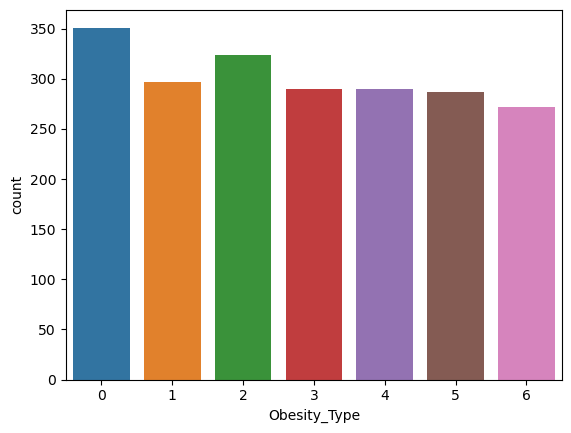

In [53]:
 # Analyze the dataset
sns.countplot(x='Obesity_Type', data=data_obese)
plt.show()

# Age and Weight Plot

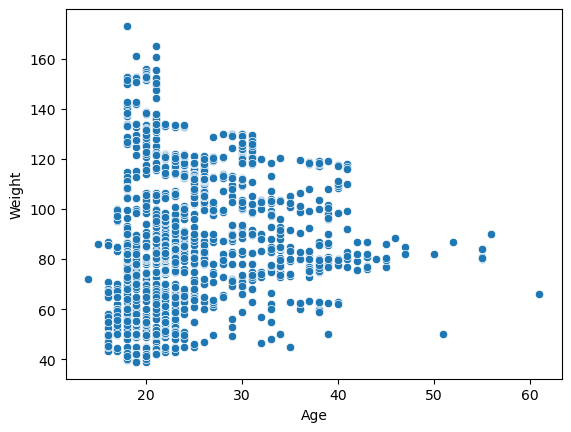

In [54]:
# Create a scatter plot of Age vs Weight

sns.scatterplot(x='Age', y='Weight', data=data_obese)
plt.show()

# Age and Obesity_Type Visualization

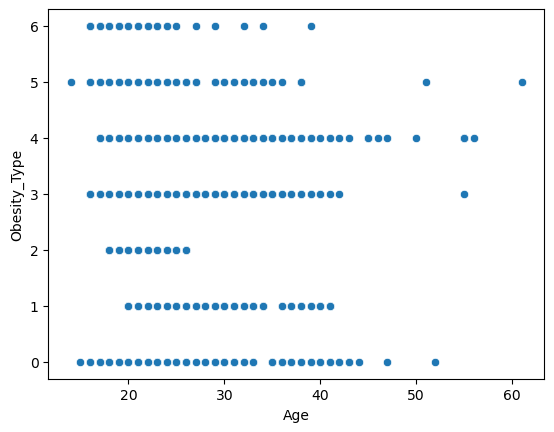

In [55]:
# Create a scatter plot of Age vs Obesity_Type

sns.scatterplot(x='Age', y='Obesity_Type', data=data_obese)
plt.show()

# Pairplot of the dataframe with regard to the target data

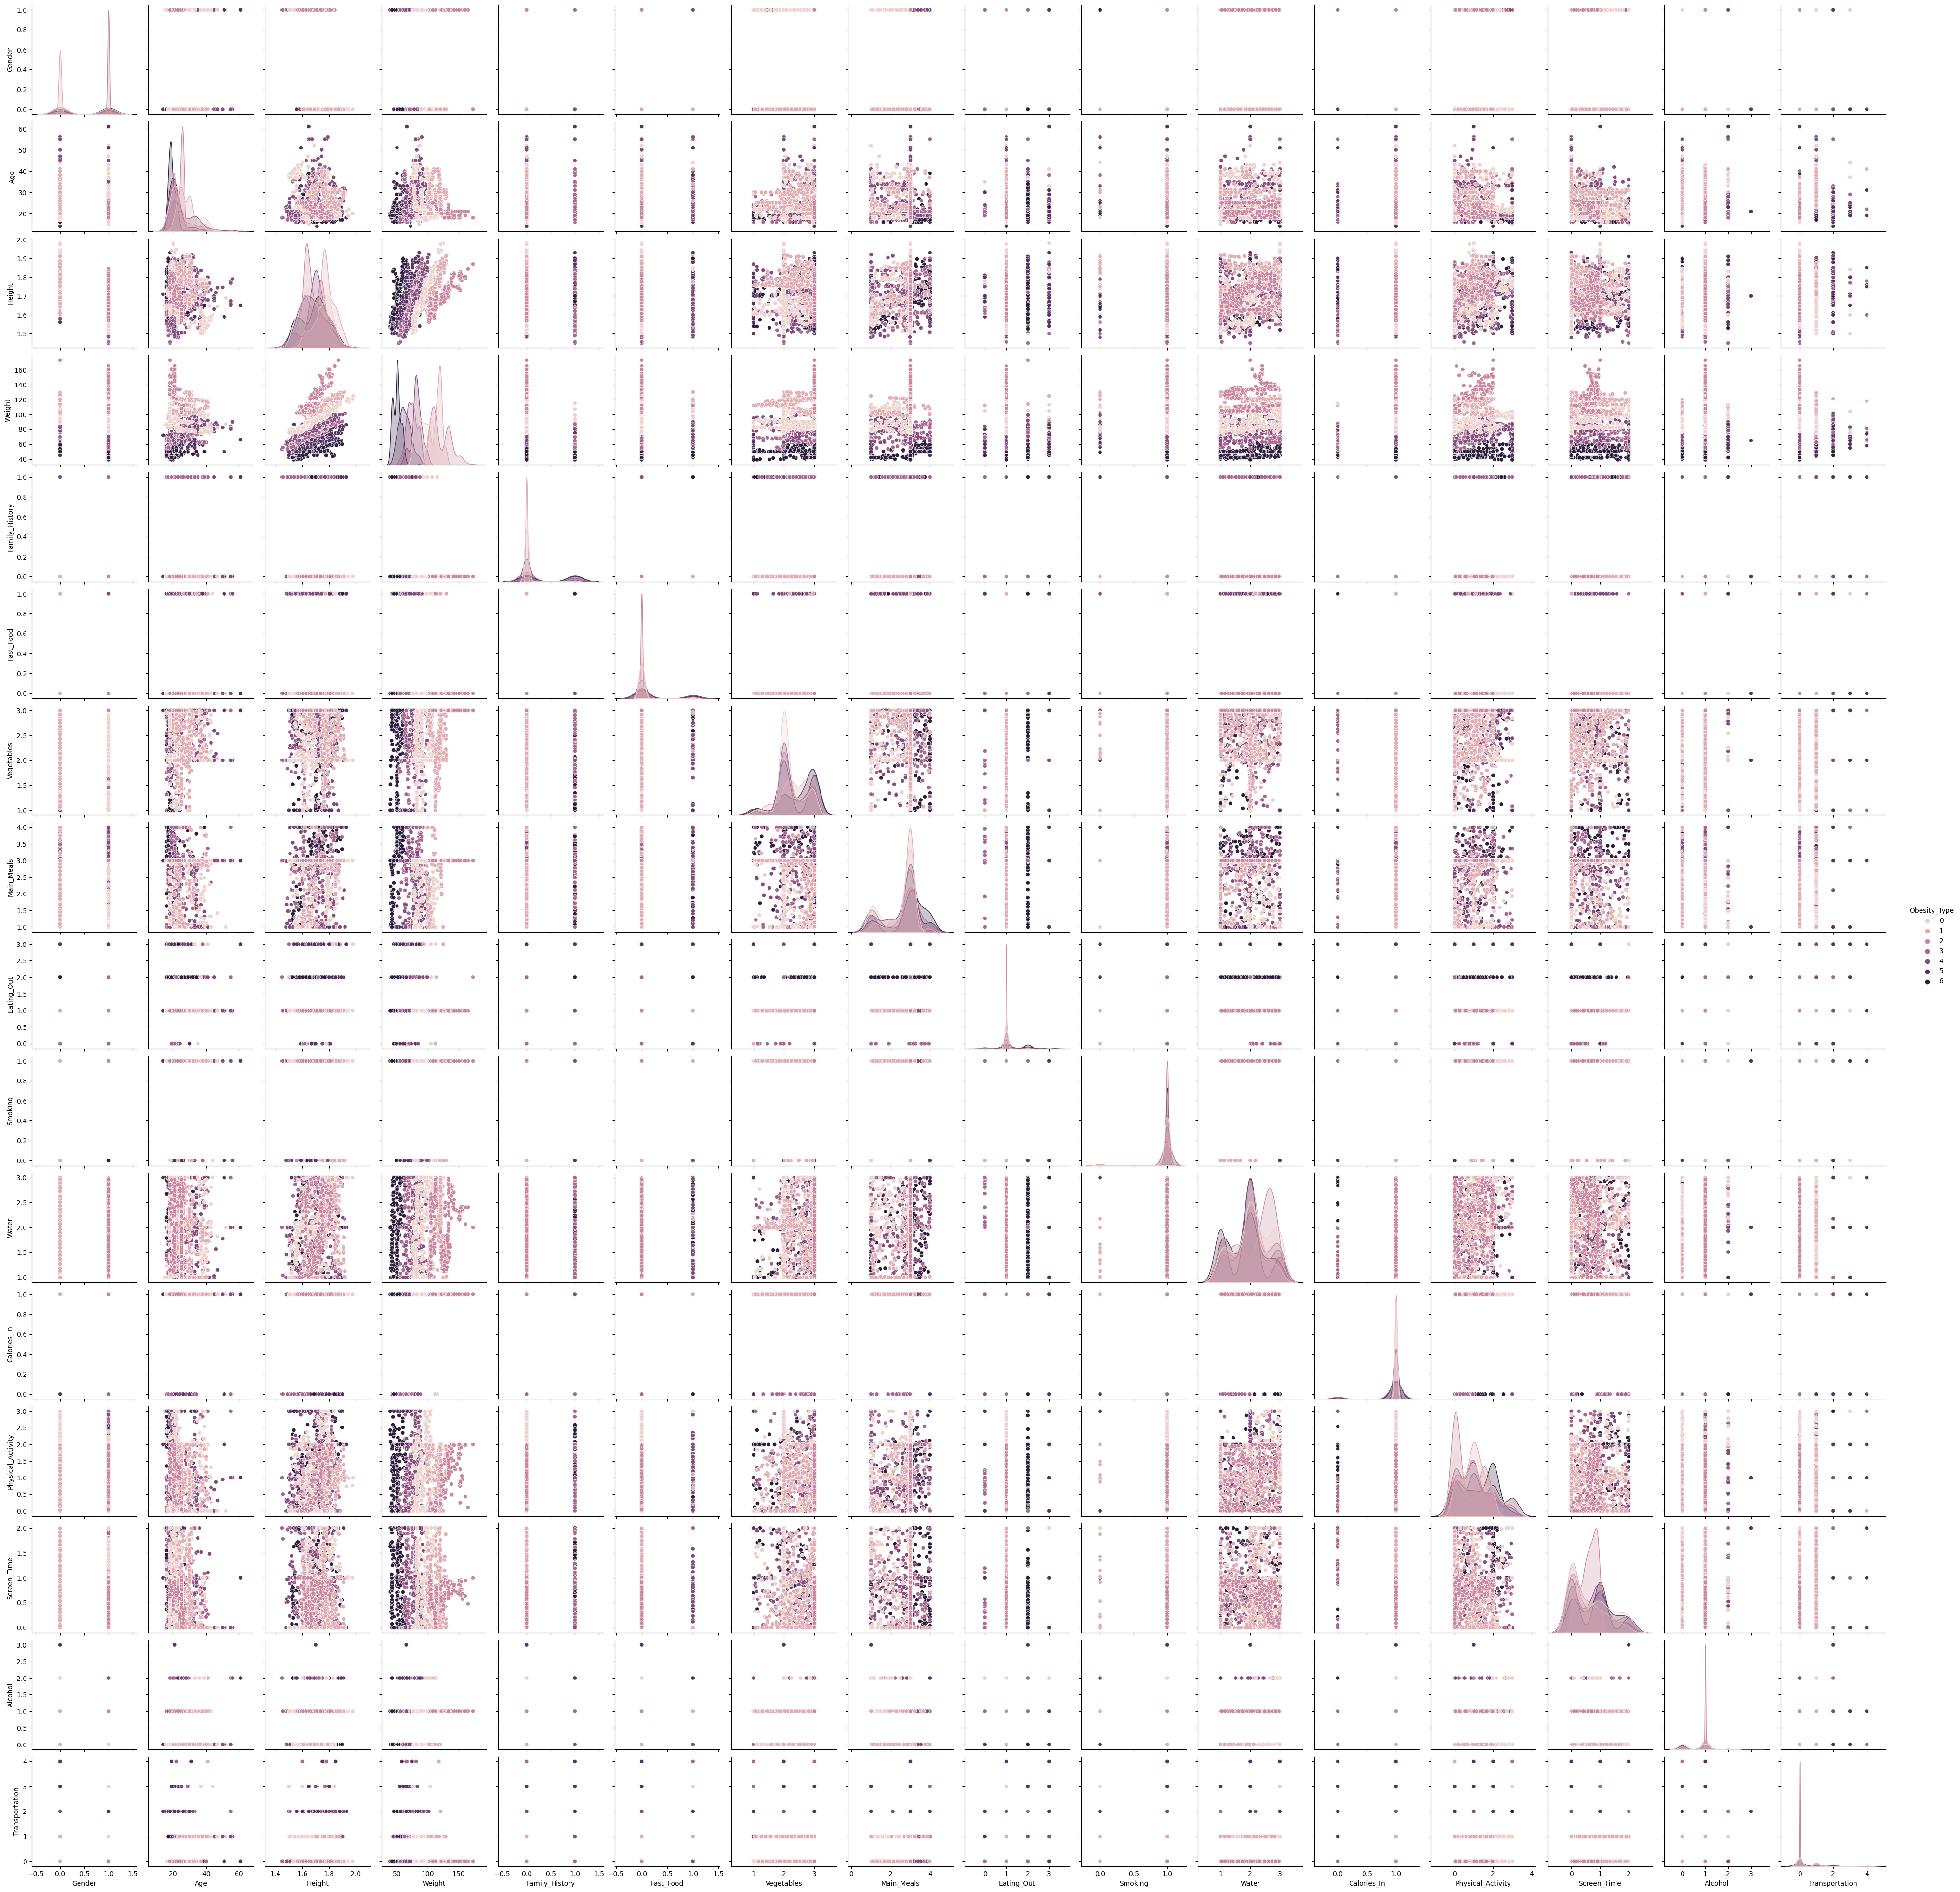

In [56]:
# creates a pair plot of all the variables in the "data_obese" dataframe,
# with the "Obesity_Type" variable used to color-code the data points, showing relationships of all vairables.

sns.pairplot(data_obese, hue='Obesity_Type')
plt.show()

# Correlation Matrix 

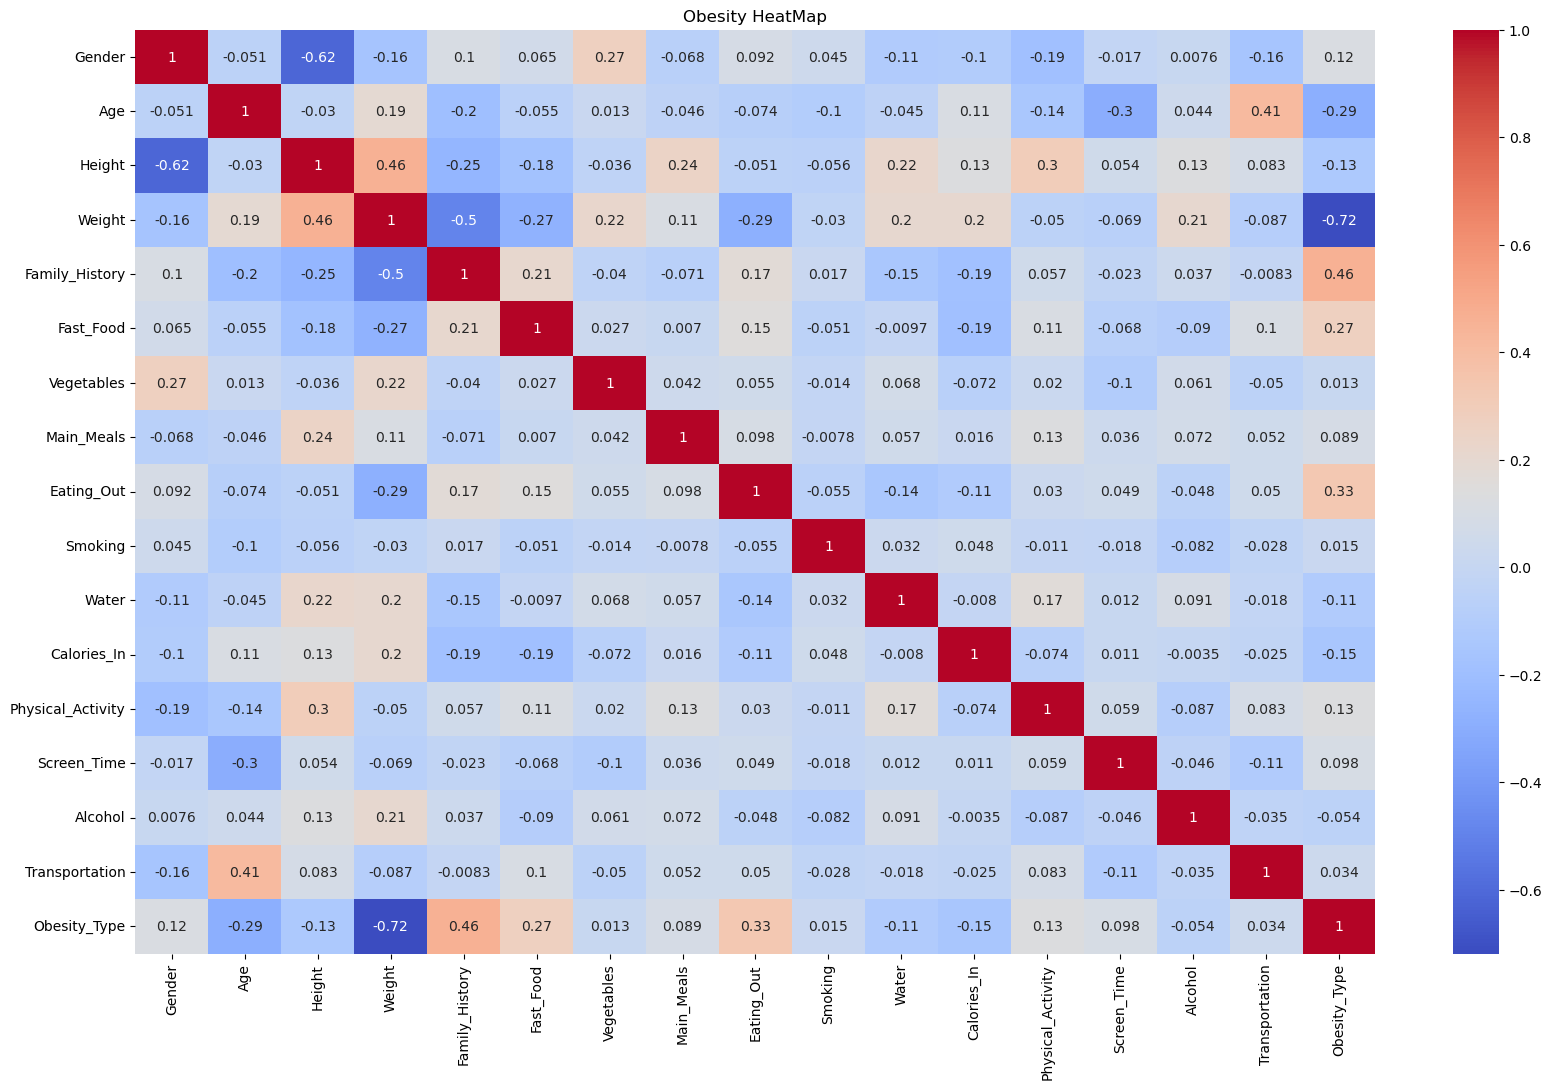

In [57]:
# The code corr = data_obese.corr() computes the correlation matrix of the "data_obese" dataframe, 
# which is a matrix that shows the correlation coefficients between all pairs of variables in the dataset.

corr = data_obese.corr()
plt.figure(figsize = (20,12))
sns.heatmap(corr, annot=True, cmap = 'coolwarm')
plt.title('Obesity HeatMap')
plt.xticks()
plt.yticks(rotation = 0)
plt.show()

In [58]:
# Checking whether the second column has any null value.
data_obese.iloc[:].isnull().values.any()

False

# Calculating Min, Max and Mean Value of Age Column

In [59]:
# Calculating min, max and mean value of Age column.
data_obese['Age'].min()

14

In [60]:
# Calculating min, max and mean value of Age column.
data_obese['Age'].max()

61

In [61]:
data_obese['Age'].mean()

23.972998578872573

In [62]:
data_obese['Age'].mode()

0    21
Name: Age, dtype: int32

In [63]:
#Counting each value in the first column.

data_obese.iloc[:,0].unique()

array([1, 0], dtype=int64)

# DecisionTreeClassifier

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [65]:
le = LabelEncoder()
data_obese['Obesity_Type'] = le.fit_transform(data_obese['Obesity_Type'])
X = data_obese.drop('Obesity_Type', axis=1)
y = data_obese['Obesity_Type']

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =0)

In [67]:
# Scaling features:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.transform(X_test)

# Training the Model Using Decision Tree Classifier

In [68]:

# It is not necessary to implement Decision Tree You can use KneighborsClassifier from scikit learn library.

from sklearn.tree import DecisionTreeClassifier
Classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Classifier.fit( X_train_s, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Feature Select_

In [69]:
# Classifier.feature_importances_

In [70]:
# print(len(features))
# print(X_train.shape[1])

In [71]:
#features = X_train_s.columns.tolist()
features = data_obese.columns.tolist()
features.remove('Obesity_Type')

In [72]:
importance = Classifier.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
print(importance)

[0.11977926 0.02003615 0.20810149 0.60091155 0.00239327 0.01104132
 0.00462626 0.00644721 0.00503189 0.         0.009011   0.00078422
 0.00366786 0.00340508 0.00157291 0.00319052]


In [73]:
feature_importance = feature_importance.sort_values('Importance', ascending = False)
print('Feature Importance:')
print(feature_importance)

Feature Importance:
              Feature  Importance
3              Weight    0.600912
2              Height    0.208101
0              Gender    0.119779
1                 Age    0.020036
5           Fast_Food    0.011041
10              Water    0.009011
7          Main_Meals    0.006447
8          Eating_Out    0.005032
6          Vegetables    0.004626
12  Physical_Activity    0.003668
13        Screen_Time    0.003405
15     Transportation    0.003191
4      Family_History    0.002393
14            Alcohol    0.001573
11        Calories_In    0.000784
9             Smoking    0.000000


# Making Predictions

In [74]:
# Predicting the test set

y_pred=Classifier.predict(X_test_s)
print(y_pred)

[1 0 3 2 2 1 6 2 0 1 2 0 3 0 5 0 5 2 4 4 2 0 1 4 0 1 2 4 3 1 3 4 4 5 1 3 4
 6 3 6 5 4 6 3 2 1 0 6 2 6 3 1 1 3 0 0 3 3 1 5 0 5 0 6 6 1 3 3 3 0 4 2 1 0
 0 5 0 3 1 6 4 3 0 3 4 5 5 0 2 1 3 6 6 1 4 2 0 1 1 1 6 0 6 3 2 0 4 2 3 4 6
 3 0 5 0 4 0 0 4 6 0 2 6 6 2 4 0 3 4 3 5 0 5 0 4 2 3 1 2 1 4 4 5 6 6 5 4 4
 0 6 4 3 2 2 2 0 0 5 1 3 0 2 4 2 6 6 0 0 3 2 3 1 2 5 3 1 0 6 5 1 3 0 2 2 2
 6 3 3 1 2 0 4 1 4 5 2 1 1 0 3 5 5 3 3 0 3 0 0 0 6 3 3 5 1 1 4 3 2 4 2 1 0
 5 6 2 2 5 4 3 6 2 2 3 2 6 1 5 4 0 2 0 6 2 2 5 5 6 2 4 4 0 3 4 2 5 2 5 2 0
 5 2 5 5 5 6 0 1 6 3 2 4 0 2 5 4 0 5 5 5 4 0 5 6 5 4 5 0 2 4 2 2 1 5 2 2 3
 6 5 2 2 6 5 3 6 4 2 3 6 6 6 3 6 0 6 1 1 2 6 5 6 1 0 2 4 2 4 0 6 6 5 5 3 6
 6 5 6 6 6 1 3 0 3 5 6 5 4 3 2 4 5 6 1 2 3 1 4 0 4 1 3 1 6 0 2 4 6 0 2 6 2
 1 2 0 6 4 0 5 0 2 6 6 2 3 4 1 0 6 5 6 1 4 5 1 1 4 5 0 5 3 0 6 4 2 0 3 5 2
 6 0 4 4 2 3 1 6 3 4 3 5 1 2 1 1 0 1 0 0 6 4 5 2 2 0 2 2 1 0 1 0 5 6 1 3 2
 2 0 5 4 4 0 3 3 0 1 0 2 6 6 0 1 2 6 4 6 2 3 0 2 0 6 4 4 4 1 1 4 4 3 6 5 0
 6 2 2 2 1 6 5 5 6 6 1 1 

In [75]:
print(y_test)

1730    1
259     0
966     3
1911    2
1815    2
       ..
1592    1
731     6
1700    1
1442    0
171     5
Name: Obesity_Type, Length: 634, dtype: int64


# Evaluating the Model

In [76]:
from sklearn import metrics
# Evaluate the accuracy of the model
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix')
print(cm,'\n\n')
print('---------------------------------------------------------')
result = metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.95


Confusion Matrix
[[100   1   1   0   0   1   0]
 [  2  87   0   0   1   0   0]
 [  0   0 101   0   0   0   0]
 [  0   0   0  76   3   2   0]
 [  1   0   0   2  79   0   0]
 [  1   0   0   5   0  74   7]
 [  1   0   0   0   0   4  85]] 


---------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       103
           1       0.99      0.97      0.98        90
           2       0.99      1.00      1.00       101
           3       0.92      0.94      0.93        81
           4       0.95      0.96      0.96        82
           5       0.91      0.85      0.88        87
           6       0.92      0.94      0.93        90

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



# Decision Tree accuracy:0.94

#  Visualising the Confusion Matrix using Seaborn Heatmap 


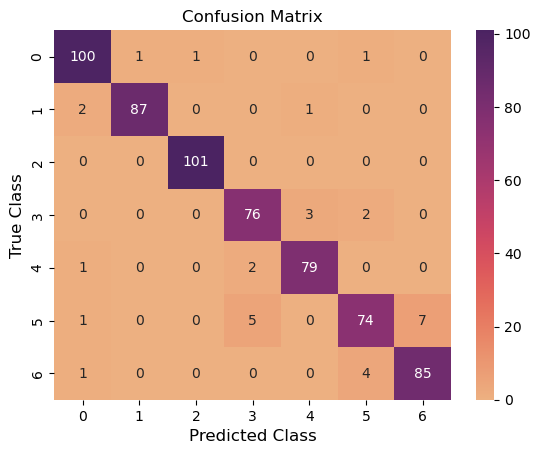

In [77]:
# Also, we can use the seaborn heatmap to visualise the confusion matrix.

ax = sns.heatmap(cm, cmap = 'flare', annot = True, fmt = 'd')

plt.xlabel("Predicted Class",fontsize = 12)
plt.ylabel("True Class", fontsize = 12)
plt.title("Confusion Matrix", fontsize = 12)
plt.show()


# The main diagonal of the matrix contains the number of correct predictions (true positives and true negatives),
# while off-diagonal elements represent misclassifications (false positives and false negatives).

# Task 1 (b) Using Random Forest Model 

# Training The Model Using Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

# Fit the classifier to the training data
rf_classifier.fit(X_train_s, y_train)


RandomForestClassifier(criterion='entropy', random_state=0)

# Making Predictions

In [79]:
# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test_s)


In [80]:
print(y_pred_rf)

[1 0 3 2 2 1 6 2 0 1 2 0 3 0 5 0 5 2 3 4 2 0 0 4 0 1 2 4 4 1 3 4 4 5 1 3 4
 6 3 5 3 4 6 3 2 1 0 6 2 6 3 1 1 3 0 0 3 3 1 5 0 5 0 6 6 1 5 3 3 0 4 2 1 0
 0 5 0 3 1 6 4 3 0 5 4 5 5 1 2 1 5 5 6 1 4 2 0 1 1 1 6 0 6 3 2 0 4 2 3 4 6
 3 0 5 0 4 0 0 4 6 0 2 6 5 2 4 0 3 4 3 6 5 5 0 4 2 3 1 2 1 4 4 5 6 6 5 4 4
 0 6 4 3 2 2 2 0 0 5 1 3 0 2 4 2 6 6 1 0 3 2 3 1 2 5 3 1 0 6 5 1 3 0 2 2 2
 6 3 3 1 2 0 4 1 4 5 2 1 1 0 5 5 6 3 3 0 4 0 0 0 6 3 5 5 1 1 4 3 2 4 2 1 0
 5 6 2 2 5 4 3 6 2 2 3 2 6 1 5 4 0 2 0 6 2 2 5 5 6 2 4 4 0 5 4 2 5 2 5 2 0
 5 2 5 5 5 6 0 1 6 5 2 4 0 2 5 4 0 5 5 5 4 0 5 6 5 5 3 0 2 4 2 2 1 5 2 2 3
 5 5 2 2 6 5 5 6 4 2 3 6 6 6 3 6 0 6 1 1 2 6 5 6 1 0 2 4 2 4 0 6 6 5 5 3 6
 6 5 6 6 6 1 3 0 3 5 6 6 4 5 0 4 5 6 1 2 3 1 4 0 4 1 3 1 6 0 2 4 6 0 2 6 2
 1 2 5 6 4 0 5 0 2 6 6 2 3 0 1 0 6 5 6 1 0 5 1 1 4 5 0 5 3 0 6 4 2 0 3 5 2
 6 0 4 4 2 3 1 6 3 4 3 5 1 2 1 1 0 1 0 0 6 5 5 2 2 4 2 2 1 0 1 0 5 5 1 3 2
 2 0 5 4 4 0 3 3 0 1 0 2 5 6 0 1 2 6 4 6 2 5 0 2 0 6 3 4 4 1 1 4 4 3 6 5 0
 6 2 2 2 1 6 5 5 6 6 1 1 

In [81]:
print(y_test)

1730    1
259     0
966     3
1911    2
1815    2
       ..
1592    1
731     6
1700    1
1442    0
171     5
Name: Obesity_Type, Length: 634, dtype: int64


# Model Evaluation

In [82]:
from sklearn import metrics
y_pred_rf = rf_classifier.predict(X_test_s)  # Assuming X_test_s and rf_classifier are defined

accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
print('Accuracy of Random Forest: {:.2f}'.format(accuracy_rf))

# Calculate and print the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:')
print(cm)
print('\n')

print('---------------------------------------------------------')

# Generate and print the classification report
result = metrics.classification_report(y_test, y_pred_rf)
print('Classification Report:\n')
print(result)


Accuracy of Random Forest: 0.95
Confusion Matrix:
[[101   0   0   0   1   1   0]
 [  0  90   0   0   0   0   0]
 [  0   0 101   0   0   0   0]
 [  0   0   0  69   4   8   0]
 [  4   0   0   2  75   1   0]
 [  0   0   0   2   0  83   2]
 [  0   0   0   0   0   4  86]]


---------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       103
           1       1.00      1.00      1.00        90
           2       1.00      1.00      1.00       101
           3       0.95      0.85      0.90        81
           4       0.94      0.91      0.93        82
           5       0.86      0.95      0.90        87
           6       0.98      0.96      0.97        90

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.96      0.95      0.95       634



# Accuracy of Random Forest: 0.95

# Visualisation of the Confusion Matrix Using Seaborn Heatmap

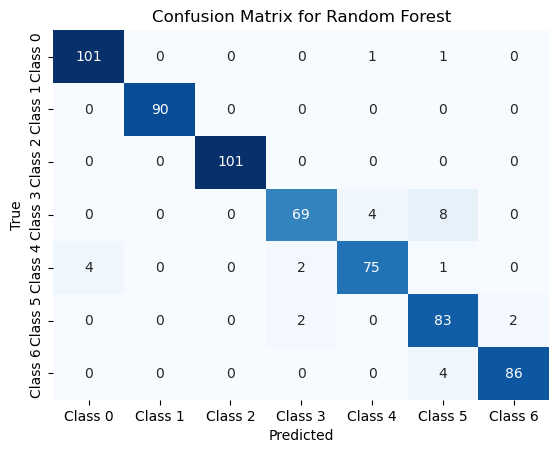

In [83]:
# Generate a confusion matrix for the Random Forest model
from sklearn.metrics import confusion_matrix

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap using Seaborn
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']
           )

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')
plt.show()


# Selected Features

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# List of features of interest
feature_importance = ['Weight', 'Height', 'Gender', 'Age', 'Fast_Food', 'Water', 'Main_Meals',
                      'Screen_Time', 'Eating_Out', 'Vegetables', 'Physical_Activity', 'Transportation', 'Family_History']

In [85]:

# Subset the dataframe based on the features of interest
X_subset = data_obese[feature_importance]

# Target variable column
y = data_obese['Obesity_Type']


In [86]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)


In [87]:
# Initialize the Decision Tree Classifier
classifier = DecisionTreeClassifier()

# Training of Model 

In [88]:
# Fit the model to the training data
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [89]:
# Make predictions on the test data
y_pred = classifier.predict(X_test)


In [90]:
# Generate the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Print the classification report
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:')
print(result)

# Calculate the accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Confusion Matrix:
[[72  4  0  0  1  1  0]
 [ 2 56  0  0  0  0  0]
 [ 0  0 63  0  0  0  0]
 [ 0  0  0 51  0  5  0]
 [ 1  0  0  4 45  0  0]
 [ 1  0  0  3  1 53  4]
 [ 0  0  0  0  0  1 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        78
           1       0.93      0.97      0.95        58
           2       1.00      1.00      1.00        63
           3       0.88      0.91      0.89        56
           4       0.96      0.90      0.93        50
           5       0.88      0.85      0.87        62
           6       0.93      0.98      0.96        56

    accuracy                           0.93       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.93      0.93      0.93       423

Accuracy: 0.933806146572104


# Accuracy: 0.94 (Selected Features)

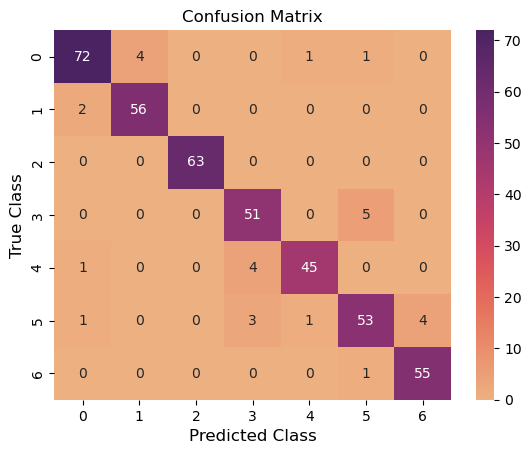

In [91]:
ax = sns.heatmap(cm, cmap = 'flare', annot = True, fmt = 'd')


plt.xlabel("Predicted Class",fontsize = 12)
plt.ylabel("True Class", fontsize = 12)
plt.title("Confusion Matrix", fontsize = 12)
plt.show()

# Normalization 

In [92]:
from sklearn.preprocessing import MinMaxScaler

# Separating features and target variable
X = data_obese.drop('Obesity_Type', axis=1)  # Features
y = data_obese['Obesity_Type']  # Target variable

In [93]:
# Normalizing the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)



In [94]:
# Creating a new DataFrame with normalized features
data_obese_normalized = pd.DataFrame(X_normalized, columns=X.columns)
data_obese_normalized['Obesity_Type'] = y  # Adding the target variable back


In [95]:
# Checking the normalized DataFrame
data_obese_normalized.head()

Gender       Age    Height    Weight  Family_History  Fast_Food  \
0     1.0  0.148936  0.320755  0.186567             0.0        1.0   
1     1.0  0.170213  0.132075  0.126866             0.0        1.0   
2     0.0  0.191489  0.660377  0.283582             0.0        1.0   
3     0.0  0.276596  0.474575  0.358209             1.0        1.0   
4     0.0  0.170213  0.622642  0.379104             1.0        1.0   

   Vegetables  Main_Meals  Eating_Out  Smoking  Water  Calories_In  \
0         0.5    0.666667    0.333333      1.0    0.5          1.0   
1         1.0    0.666667    0.333333      0.0    1.0          0.0   
2         0.5    0.666667    0.333333      1.0    0.5          1.0   
3         1.0    0.666667    0.333333      1.0    0.5          1.0   
4         0.5    0.000000    0.333333      1.0    0.5          1.0   

   Physical_Activity  Screen_Time   Alcohol  Transportation  Obesity_Type  
0           0.000000          0.5  0.000000             0.0             5  
1           1.000000          0.0  0.333333             0.0             5  
2           0.666667          0.5  0.666667             0.0             5  
3           0.666667          0.0  0.666667             0.5             3  
4           0.000000          0.0  0.333333             0.0             4

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separating features and target variable
X_normalized = data_obese_normalized.drop('Obesity_Type', axis=1)
y_normalized = data_obese_normalized['Obesity_Type']



In [97]:
# Splitting the data into train and test sets
X_train_norm, X_test_norm,y_train_norm,y_test_norm = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)


In [98]:

# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)



In [99]:

# Training the model
rf_classifier.fit(X_train_norm, y_train_norm)



RandomForestClassifier(random_state=42)

Confusion Matrix after training:
[[76  2  0  0  0  0  0]
 [ 1 57  0  0  0  0  0]
 [ 0  0 63  0  0  0  0]
 [ 0  0  0 49  1  6  0]
 [ 0  0  0  2 48  0  0]
 [ 0  0  0  5  0 56  1]
 [ 0  0  0  0  0  2 54]]
Accuracy: 0.9527


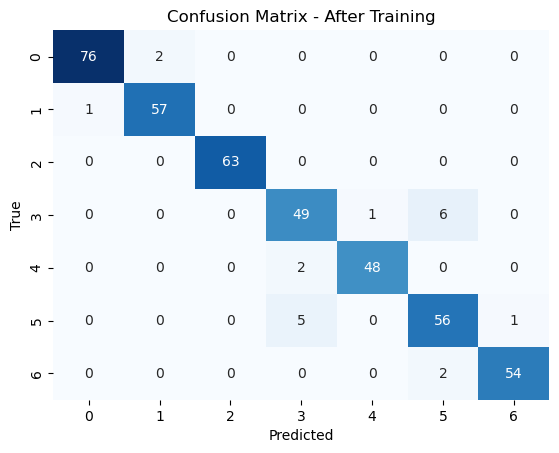

In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the model (assuming rf_classifier is defined)
rf_classifier.fit(X_train_norm, y_train_norm)

y_pred_norm = rf_classifier.predict(X_test_norm)

conf_matrix_norm = confusion_matrix(y_test_norm, y_pred_norm)
accuracy_norm = accuracy_score(y_test_norm, y_pred_norm)

print("Confusion Matrix after training:")
print(conf_matrix_norm)
print(f"Accuracy: {accuracy_norm:.4f}")

# Display Confusion Matrix
sns.heatmap(conf_matrix_norm, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - After Training')
plt.show()
